**Crear modelo**

In [1]:
#Importar las librerías numpy, matplotlib, keras
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (21,14) # Un poco más grande para mostrar más caracteres

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
#Instalar repositorio de datasets extras a keras
!pip install extra-keras-datasets
from extra_keras_datasets import emnist

In [3]:
#Descargar el dataset de dígitos y letras (47)
#Balanced= 131.600 characters across 47 balanced classes
#Distribuir estos en sets de entrenamiento y test
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print("X_train original shape", X_train.shape)
print("X_train original shape", X_test.shape)
print("y_train original shape", y_train.shape)
print("y_train original shape", y_test.shape)
#Más datasets https://github.com/christianversloot/extra_keras_datasets


X_train original shape (112800, 28, 28)
X_train original shape (18800, 28, 28)
y_train original shape (112800,)
y_train original shape (18800,)


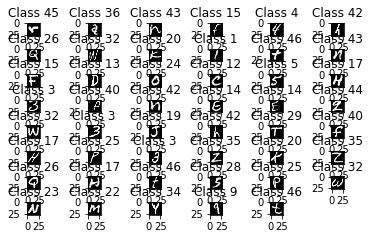

In [4]:
#Mostrar las imágenes
fig = plt.figure()
fig.subplots_adjust(hspace=1, wspace=1)
for i in range(47):
    plt.subplot(9,6,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))
#C, I, J, K, L, M, O, P, S, U, V, W, X, Y and Z
#['0','1','2','3','4','5','6','7','8','9',
 #'A','B','C','D','E','F','G','H','I','J',
 #'K','L','M','N','O','P','Q','R','S','T',
 #'U','V','W','X','Y','Z','a','b','d','e',
 #'f','g','h','n','q','r','t']

In [5]:
#Se indica en número de clases 
nb_classes=47
print("Antes de categorical", y_test.shape)
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
print("Después de categorical", Y_test.shape)

Antes de categorical (18800,)
Después de categorical (18800, 47)


In [ ]:
#Recordar las clases
#nb_classes=48
['0','1','2','3','4','5','6','7','8','9',
 'A','B','C','D','E','F','G','H','I','J',
 'K','L','M','N','O','P','Q','R','S','T',
 'U','V','W','X','Y','Z','a','b','d','e',
 'f','g','h','n','q','r','t']

Exclusivo para Modelo *1*

In [6]:
#Para MODELO 1
#Reshape (Solo para modelo 1), es convertir la imágen de matriz 28x28 a un vector de 784
X_train = X_train.reshape(112800, 784)
X_test = X_test.reshape(18800, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#normalize our data values to the range [0, 1]
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (112800, 784)
Testing matrix shape (18800, 784)


In [10]:
#Para MODELO 1
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.
                           
model.add(Dropout(0.2))   # Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(47))
model.add(Activation('softmax')) # This special "softmax" activation among other things,
                                 # ensures the output is a valid probaility distribution, that is
                                 # that its values are all non-negative and sum to 1.

In [ ]:
#Guardar weights para la exportación
model.save_weights("modelCNV.h5")

In [11]:

#loss=ayuda a evaluar el nivel de error
#optimizer=is the way we have to specify the optimization algorithm that allows the neural network to calculate the weights of the parameters
#metrics=metric that we will use to monitor the learning process
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])


In [12]:
print("X_train original shape", X_test.shape)
print("y_train original shape", y_test.shape)
model.fit(X_train, Y_train,
          batch_size=128, epochs=8, verbose=1,
          validation_data=(X_test, Y_test))
# 128 4epochs loss: 0.6997 - accuracy: 0.7736 - val_loss: 0.5590 - val_accuracy: 0.8169
#1024 loss: 0.5564 - accuracy: 0.8127 - val_loss: 0.4904 - val_accuracy: 0.8349
#4 epochs 1 min, loss: 0.2871 - accuracy: 0.8880 - val_loss: 0.4591 - val_accuracy: 0.8585
#5 epochs 1:30min loss: 0.3508 - accuracy: 0.8700 - val_loss: 0.4325 - val_accuracy: 0.8577

#Modelo 1:
#loss: 0.4446 - accuracy: 0.8457 - val_loss: 0.4494 - val_accuracy: 0.8481

#Modelo 2:
#loss: 0.0326 - accuracy: 0.9883 - val_loss: 1.1876 - val_accuracy: 0.8404


X_train original shape (18800, 784)
y_train original shape (18800,)
Train on 112800 samples, validate on 18800 samples
Epoch 1/8
112800/112800 [==============================] - 4s 37us/step - loss: 1.0080 - accuracy: 0.6973 - val_loss: 0.6165 - val_accuracy: 0.7987
Epoch 2/8
112800/112800 [==============================] - 4s 33us/step - loss: 0.5981 - accuracy: 0.8021 - val_loss: 0.5143 - val_accuracy: 0.8288
Epoch 3/8
112800/112800 [==============================] - 4s 32us/step - loss: 0.5118 - accuracy: 0.8261 - val_loss: 0.4758 - val_accuracy: 0.8421
Epoch 4/8
112800/112800 [==============================] - 4s 33us/step - loss: 0.4613 - accuracy: 0.8395 - val_loss: 0.4586 - val_accuracy: 0.8438
Epoch 5/8
112800/112800 [==============================] - 4s 33us/step - loss: 0.4261 - accuracy: 0.8487 - val_loss: 0.4492 - val_accuracy: 0.8471
Epoch 6/8
112800/112800 [==============================] - 4s 32us/step - loss: 0.4040 - accuracy: 0.8559 - val_loss: 0.4352 - val_accuracy: 

Fin Exclusivo Modelo *1*

Exclusivo Modelo *2*

In [5]:
#Para MODELO2
#Creation of a basic neural network
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),strides=1,activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(32, (3, 3), activation='relu', strides=1))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(47, activation='softmax'))

In [6]:
#Guardar weights para la exportación
model.save_weights("modelCNV.h5")

In [7]:

#loss=ayuda a evaluar el nivel de error
#optimizer=is the way we have to specify the optimization algorithm that allows the neural network to calculate the weights of the parameters
#metrics=metric that we will use to monitor the learning process
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])


In [8]:
#Para MODELO 2
#Reshape de acuerdo al modelo
X_train = X_train.reshape(112800, 28,28,1)
X_test = X_test.reshape(18800, 28,28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#normalize our data values to the range [0, 1]
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (112800, 28, 28, 1)
Testing matrix shape (18800, 28, 28, 1)


In [9]:
print("X_train original shape", X_test.shape)
print("y_train original shape", y_test.shape)
model.fit(X_train, Y_train,
          batch_size=128, epochs=8, verbose=1,
          validation_data=(X_test, Y_test))
# 128 4epochs loss: 0.6997 - accuracy: 0.7736 - val_loss: 0.5590 - val_accuracy: 0.8169
#1024 loss: 0.5564 - accuracy: 0.8127 - val_loss: 0.4904 - val_accuracy: 0.8349
#4 epochs 1 min, loss: 0.2871 - accuracy: 0.8880 - val_loss: 0.4591 - val_accuracy: 0.8585
#5 epochs 1:30min loss: 0.3508 - accuracy: 0.8700 - val_loss: 0.4325 - val_accuracy: 0.8577

#Modelo 1:
#loss: 0.4446 - accuracy: 0.8457 - val_loss: 0.4494 - val_accuracy: 0.8481

#Modelo 2:
#loss: 0.0326 - accuracy: 0.9883 - val_loss: 1.1876 - val_accuracy: 0.8404


X_train original shape (18800, 28, 28, 1)
y_train original shape (18800,)
Train on 112800 samples, validate on 18800 samples
Epoch 1/8
112800/112800 [==============================] - 11s 98us/step - loss: 0.7254 - accuracy: 0.7781 - val_loss: 0.4982 - val_accuracy: 0.8328
Epoch 2/8
112800/112800 [==============================] - 9s 76us/step - loss: 0.4039 - accuracy: 0.8610 - val_loss: 0.4443 - val_accuracy: 0.8550
Epoch 3/8
112800/112800 [==============================] - 8s 75us/step - loss: 0.3310 - accuracy: 0.8817 - val_loss: 0.4360 - val_accuracy: 0.8562
Epoch 4/8
112800/112800 [==============================] - 9s 76us/step - loss: 0.2764 - accuracy: 0.8964 - val_loss: 0.4326 - val_accuracy: 0.8597
Epoch 5/8
112800/112800 [==============================] - 8s 75us/step - loss: 0.2302 - accuracy: 0.9111 - val_loss: 0.4569 - val_accuracy: 0.8561
Epoch 6/8
112800/112800 [==============================] - 9s 76us/step - loss: 0.1907 - accuracy: 0.9240 - val_loss: 0.4942 - val_acc

Fin Exclusivo Modelo *2*

Evaluación del Modelo

In [ ]:
#Evaluación del modelo


In [13]:
#Probar el modelo
predicted_classes = model.predict_classes(X_test)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

print(len(correct_indices))
print(len(incorrect_indices))

16040
2760


[[229   0   0 ...   0   0   0]
 [  0 299   1 ...   0   0   0]
 [  0   0 366 ...   1   0   0]
 ...
 [  0   0   0 ... 234   0   2]
 [  0   1   0 ...   0 378   0]
 [  0   2   0 ...   0   6 357]]


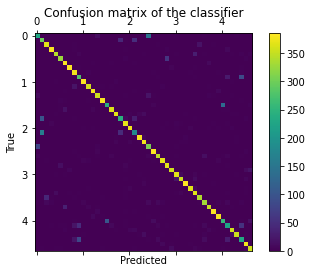

In [14]:
from sklearn.metrics import confusion_matrix, classification_report

labels = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','a','b','d','e', 'f','g','h','n','q','r','t']
cm = confusion_matrix(y_test, predicted_classes)
#print(classification_report(y_test, predicted_classes))
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

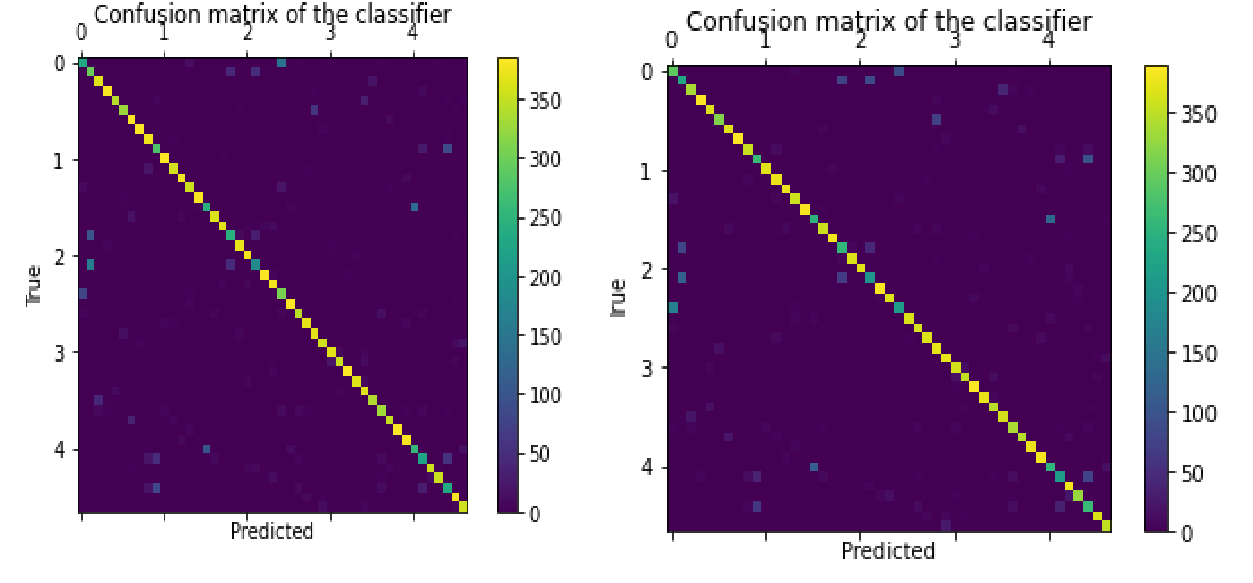

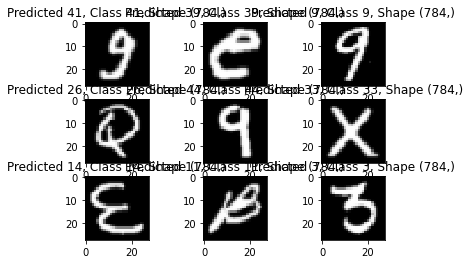

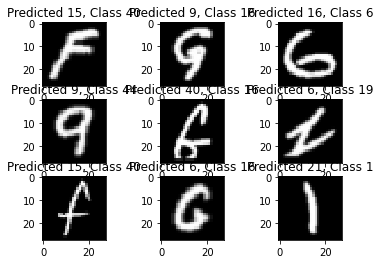

In [ ]:
#Graficar aciertos y errores
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}, Shape {}".format(predicted_classes[correct], y_test[correct],X_test[i].shape))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

**Exportar el modelo **

In [19]:
model.save("modelCNV.h5")
print("Saved model to disk")

Saved model to disk


In [20]:
from google.colab import files
files.download("modelCNV.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>